In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [34]:
img = image.load_img('data/training/ellipses/1.jpg')

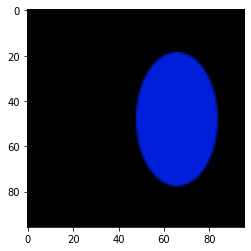

In [35]:
plt.imshow(img)

In [38]:
cv2.imread('data/training/ellipses/1.jpg').shape

(96, 96, 3)

In [39]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [53]:
train_dataset = train.flow_from_directory('data/training', 
                                        target_size=(96,96), 
                                        batch_size=3, 
                                        class_mode='binary')

validation_dataset = train.flow_from_directory('data/validation', 
                                        target_size=(96,96), 
                                        batch_size=3, 
                                        class_mode='binary')

Found 24 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [54]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3, 3,), activation = 'relu', input_shape=(96,96,3)),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(32, (3, 3,), activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(64, (3, 3,), activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        ##
        tf.keras.layers.Flatten(),
        ##
        tf.keras.layers.Dense(512,activation='relu'),
        ##
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [70]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

In [71]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=5,
    epochs=30,
    validation_data=validation_dataset
)

Epoch 1/30
5/5 [==============================] - 1s 92ms/step - loss: 0.0000e+00 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 2/30
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 3/30
5/5 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - accuracy: 0.4000 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 4/30
5/5 [==============================] - 0s 59ms/step - loss: 0.0000e+00 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 5/30
5/5 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 6/30
5/5 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 0.4667 - val_loss: 0.0000e+00 - val_accuracy: 0.3333
Epoch 7/30
5/5 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 0.3333 - val_loss: 0.000

In [97]:
validation_dataset.class_indices

{'ellipses': 0, 'rectangles': 1, 'triangles': 2}

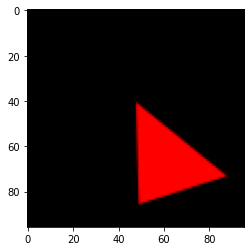

1/1 [==============================] - 0s 21ms/step
rectangle


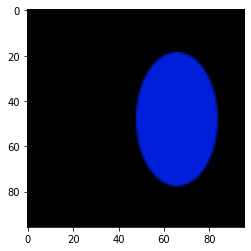

1/1 [==============================] - 0s 21ms/step
rectangle


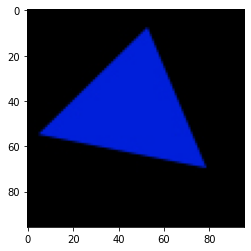

1/1 [==============================] - 0s 21ms/step
rectangle


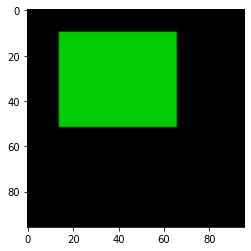

1/1 [==============================] - 0s 26ms/step
rectangle


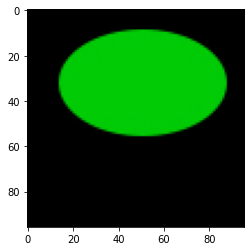

1/1 [==============================] - 0s 23ms/step
rectangle


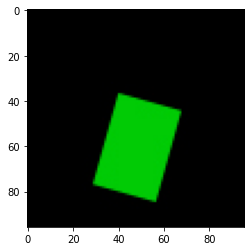

1/1 [==============================] - 0s 23ms/step
rectangle


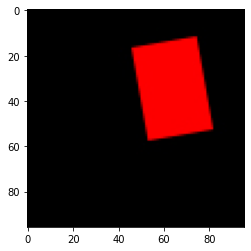

1/1 [==============================] - 0s 18ms/step
ellipse


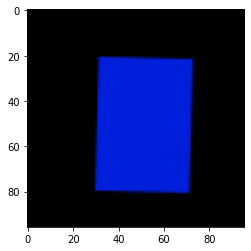

1/1 [==============================] - 0s 21ms/step
rectangle


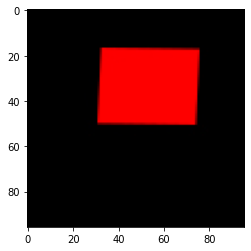

1/1 [==============================] - 0s 19ms/step
rectangle


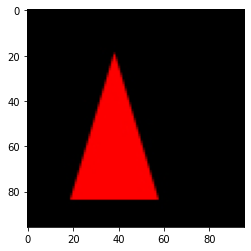

1/1 [==============================] - 0s 20ms/step
rectangle


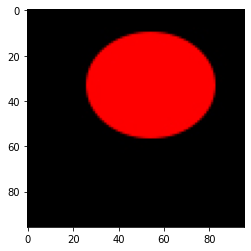

1/1 [==============================] - 0s 21ms/step
ellipse


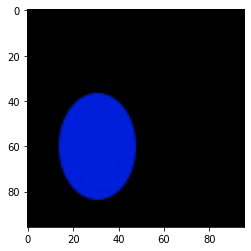

1/1 [==============================] - 0s 19ms/step
rectangle


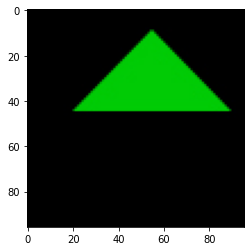

1/1 [==============================] - 0s 20ms/step
rectangle


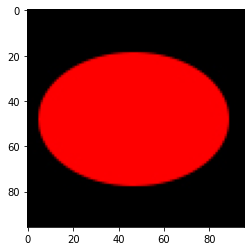

1/1 [==============================] - 0s 17ms/step
ellipse


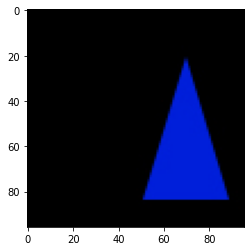

1/1 [==============================] - 0s 21ms/step
rectangle


In [99]:
dir_path = 'data/test/'

for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path,path)) and path.lower().endswith('.jpg'):
        img = image.load_img(dir_path+path,target_size=(96,96,3))
        plt.imshow(img)
        plt.show()

        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        images = np.vstack([X])

        val = model.predict(images)

        if val == 0:
            print('ellipse')
        elif val == 1:
            print('rectangle')
        else:
            print('triangle')
        # print(dir_path+path)

    # img = image.load_img(i)
    # plt.imshow(img)
    # plt.show()